In [3]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

class GameOfLife:
    def __init__(self, width=50, height=50):
        """
        Initialize the Game of Life grid and display settings.
        
        Parameters:
        - width: Width of the game grid (default: 50)
        - height: Height of the game grid (default: 50)
        """
        # Store grid dimensions as instance variables
        self.width = width
        self.height = height
        
        # Create the initial grid
        # np.random.choice creates a random grid with:
        # - Options: [0, 1] where 0 is dead, 1 is alive
        # - p=[0.85, 0.15] means 15% chance for alive cells, 85% for dead
        self.grid = np.random.choice([0, 1], size=(height, width), p=[0.85, 0.15])
        
        # Create a second grid for calculating the next generation
        # This prevents changes to the current generation while calculating the next
        self.next_grid = self.grid.copy()
        
        # Set up matplotlib for visualization
        plt.ion()  # Turn on interactive mode for real-time updates
        self.fig, self.ax = plt.subplots(figsize=(8, 8))  # Create figure and axes objects
        # Create the initial image display
        # cmap='binary' means alive cells are black, dead cells are white
        self.img = self.ax.imshow(self.grid, cmap='binary')
        plt.grid(True)  # Add grid lines for better visibility
    
    def count_neighbors(self, row, col):
        """
        Count the number of living neighbors for a cell at given coordinates.
        Uses toroidal grid (edges wrap around to opposite side).
        
        Parameters:
        - row: Row index of the cell
        - col: Column index of the cell
        
        Returns:
        - total: Number of living neighbors (0-8)
        """
        total = 0
        # Check all 8 neighboring cells
        for i in range(-1, 2):  # -1, 0, 1
            for j in range(-1, 2):  # -1, 0, 1
                # Skip the cell itself (when i=0 and j=0)
                if i == 0 and j == 0:
                    continue
                    
                # Calculate neighbor coordinates with wrapping
                # % operator wraps around to other side of grid
                neighbor_row = (row + i) % self.height
                neighbor_col = (col + j) % self.width
                
                # Add 1 if neighbor is alive (1), 0 if dead (0)
                total += self.grid[neighbor_row, neighbor_col]
                
        return total
    
    def update(self):
        """
        Update the entire grid based on Conway's Game of Life rules:
        1. Any live cell with fewer than two live neighbors dies (underpopulation)
        2. Any live cell with two or three live neighbors lives
        3. Any live cell with more than three live neighbors dies (overpopulation)
        4. Any dead cell with exactly three live neighbors becomes alive (reproduction)
        """
        # Iterate through every cell in the grid
        for row in range(self.height):
            for col in range(self.width):
                # Count living neighbors for current cell
                neighbors = self.count_neighbors(row, col)
                # Get current cell's state
                cell = self.grid[row, col]
                
                # Apply Conway's rules
                if cell == 1:  # Cell is currently alive
                    if neighbors < 2 or neighbors > 3:
                        self.next_grid[row, col] = 0  # Cell dies
                    else:
                        self.next_grid[row, col] = 1  # Cell survives
                else:  # Cell is currently dead
                    if neighbors == 3:
                        self.next_grid[row, col] = 1  # Cell becomes alive
                    else:
                        self.next_grid[row, col] = 0  # Cell stays dead
        
        # Update the current grid with the new generation
        # Use copy() to create a new array instead of just a reference
        self.grid, self.next_grid = self.next_grid.copy(), self.grid
    
    def display(self):
        """
        Update the visualization of the grid using matplotlib.
        This method updates the display in-place without creating new windows.
        """
        # Update the image data with current grid
        self.img.set_array(self.grid)
        # Redraw the figure
        self.fig.canvas.draw_idle()
        # Process any pending display events
        self.fig.canvas.flush_events()
    
    def insert_pattern(self, pattern, start_row, start_col):
        """
        Insert a predefined pattern at specified coordinates.
        
        Parameters:
        - pattern: 2D numpy array representing the pattern
        - start_row: Starting row position
        - start_col: Starting column position
        """
        pattern = np.array(pattern)
        h, w = pattern.shape
        # Copy pattern into grid, wrapping around edges if necessary
        for i in range(h):
            for j in range(w):
                self.grid[(start_row + i) % self.height, (start_col + j) % self.width] = pattern[i, j]
    
    def run(self, generations=100, interval=0.1):
        """
        Run the simulation for a specified number of generations.
        
        Parameters:
        - generations: Number of generations to simulate (default: 100)
        - interval: Time delay between generations in seconds (default: 0.1)
        """
        for _ in range(generations):
            self.display()  # Show current state
            self.update()   # Calculate next generation
            time.sleep(interval)  # Wait before next update

# Predefined patterns that exhibit interesting behavior
GLIDER = np.array([
    [0, 1, 0],  # A glider moves diagonally across the grid
    [0, 0, 1],
    [1, 1, 1]
])

BLINKER = np.array([
    [0, 0, 0],  # A blinker oscillates between horizontal and vertical
    [1, 1, 1],
    [0, 0, 0]
])

BLOCK = np.array([
    [1, 1],  # A block is stable and doesn't change
    [1, 1]
])

def create_game(width=50, height=50, pattern=None):
    """
    Create and initialize a new Game of Life instance.
    
    Parameters:
    - width: Width of the game grid (default: 50)
    - height: Height of the game grid (default: 50)
    - pattern: Optional initial pattern to insert (default: None)
    
    Returns:
    - GameOfLife instance ready to run
    """
    # Create new game instance
    game = GameOfLife(width, height)
    
    if pattern is not None:
        # Calculate center position for pattern
        start_row = height // 2 - pattern.shape[0] // 2
        start_col = width // 2 - pattern.shape[1] // 2
        # Insert pattern in center of grid
        game.insert_pattern(pattern, start_row, start_col)
    
    return game

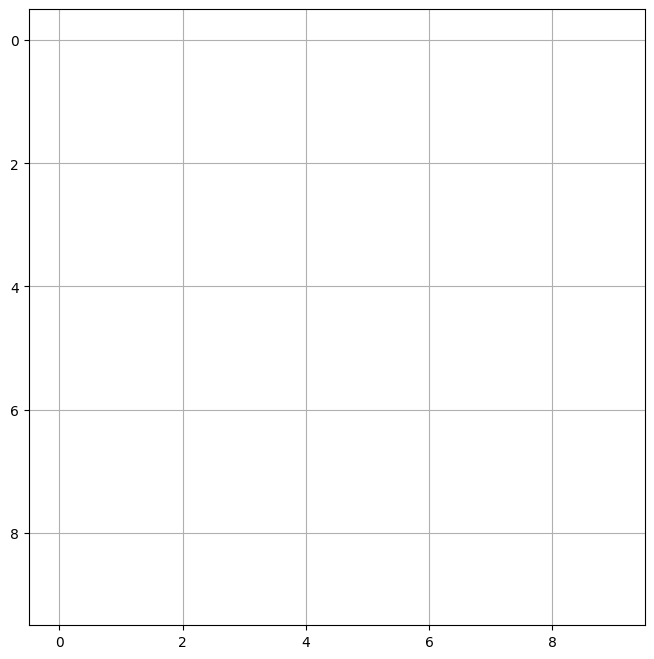

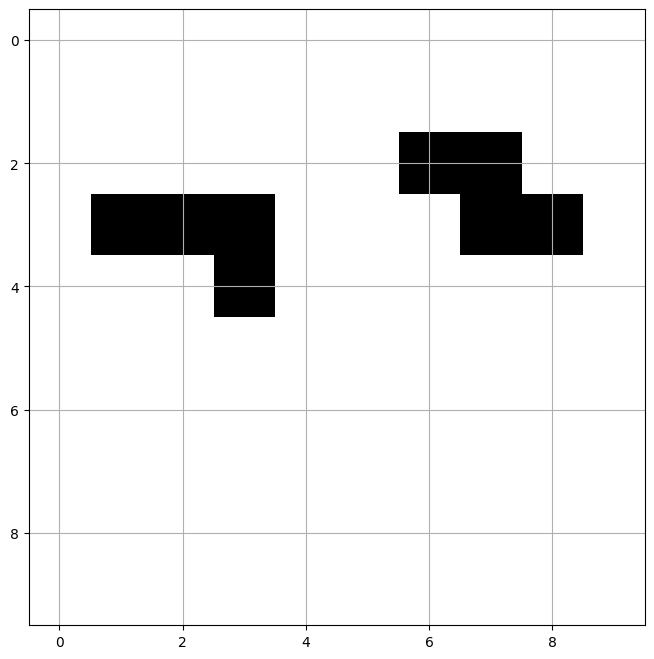

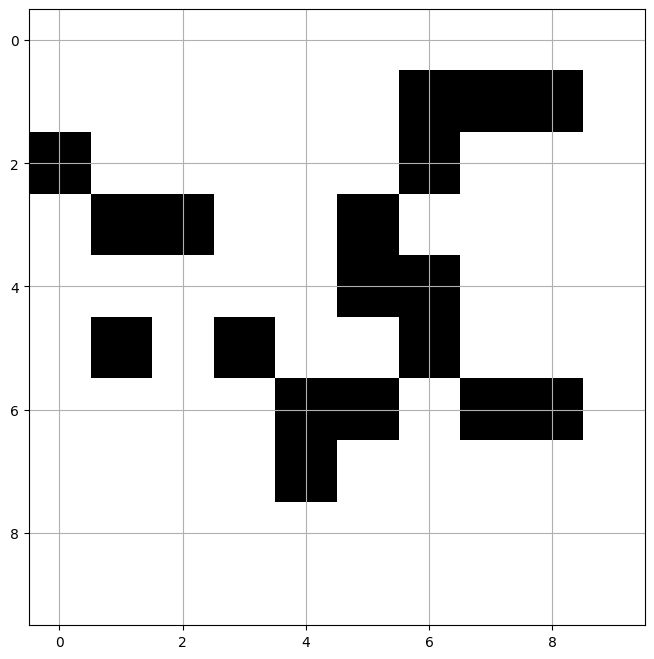